In [2]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
linux_pro1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_1.csv')
linux_pro2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_2.csv')
linux_pro = pd.concat([linux_pro1, linux_pro2])

In [5]:
linux_pro.drop('ts', axis = 1, inplace=True)
linux_pro.drop('type', axis = 1, inplace= True)

linux_pro.head()

PID  TRUN  TSLPI  TSLPU  POLI  NICE  PRI  RTPR  CPUNR Status  EXC State  \
0  3257     0     23      0  norm     0  120     0      2      N    0     S   
1  1442     0      1      0  norm     0  120     0      0      N    0     S   
2  3197     0     63      0  norm     0  120     0      3      N    0     S   
3  2774     0      8      0  norm     0  120     0      0      N    0     S   
4  2797     0      5      0  norm     0  120     0      0      N    0     S   

    CPU          CMD  label  
0  0.13  Web-Content      0  
1  0.09         Xorg      0  
2  0.06      firefox      0  
3  0.06       compiz      0  
4  0.04     nautilus      0

In [6]:
linux_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927968 entries, 0 to 927967
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   TRUN    int64  
 2   TSLPI   int64  
 3   TSLPU   int64  
 4   POLI    object 
 5   NICE    int64  
 6   PRI     int64  
 7   RTPR    int64  
 8   CPUNR   int64  
 9   Status  object 
 10  EXC     int64  
 11  State   object 
 12  CPU     float64
 13  CMD     object 
 14  label   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 235.3+ MB


In [7]:
linux_pro['State'].replace('S',  '-2', inplace=True)
linux_pro['State'].replace('I',  '2', inplace=True)
linux_pro['State'].replace('R',  '1', inplace=True)
linux_pro['State'].replace('E',  '0', inplace=True)
linux_pro['State'].replace('Z',  '4', inplace=True)
linux_pro['State'].replace('D',  '-1', inplace=True)
linux_pro['State'].replace('T',  '3', inplace=True)
linux_pro['State']=linux_pro['State'].astype(int)

linux_pro['Status'].replace('-',  '-1', inplace=True)
linux_pro['Status'].replace('NE',  '1', inplace=True)
linux_pro['Status'].replace('N',  '2', inplace=True)
linux_pro['Status'].replace('NS',  '3', inplace=True)
linux_pro['Status'].replace('C',  '4', inplace=True)
linux_pro['Status'].replace('NC',  '5', inplace=True)
linux_pro['Status']=linux_pro['Status'].astype(int)

linux_pro['POLI'].replace('-',  '-1', inplace=True)
linux_pro['POLI'].replace('norm',  '1', inplace=True)
linux_pro['POLI']=linux_pro['POLI'].astype(int)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_pro['CMD'] = le.fit_transform(linux_pro['CMD'])

col:  PID


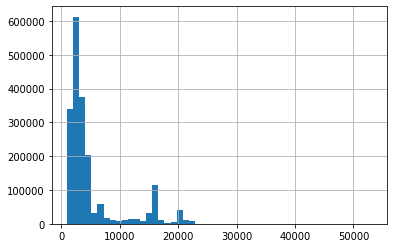

col:  TRUN


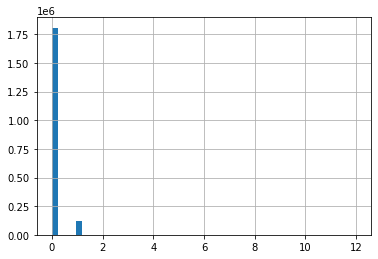

col:  TSLPI


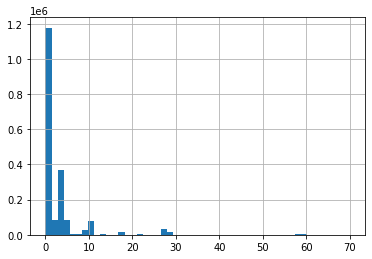

col:  TSLPU


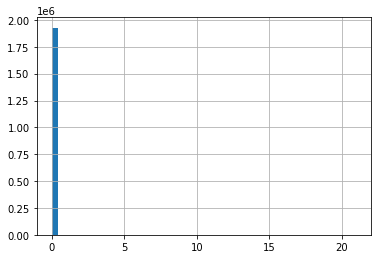

col:  POLI


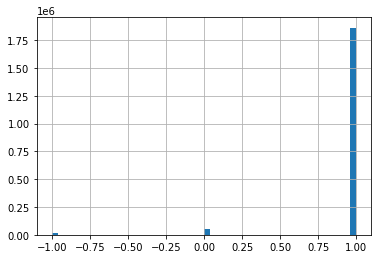

col:  NICE


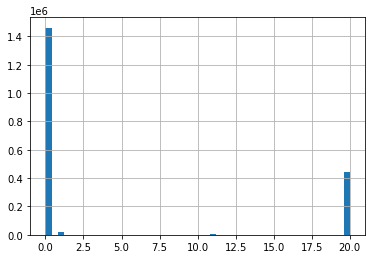

col:  PRI


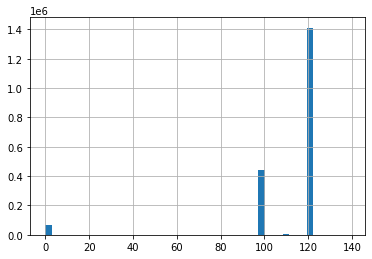

col:  RTPR


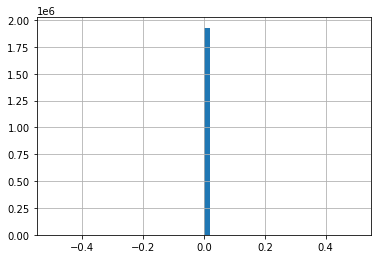

col:  CPUNR


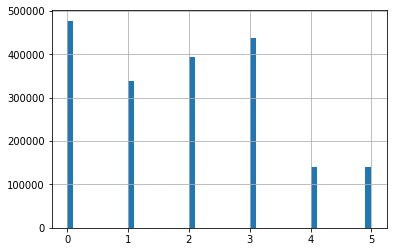

col:  Status


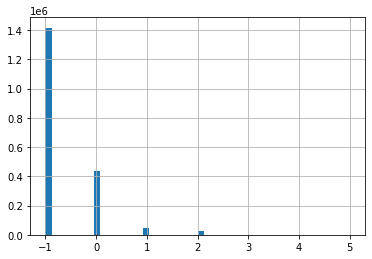

col:  EXC


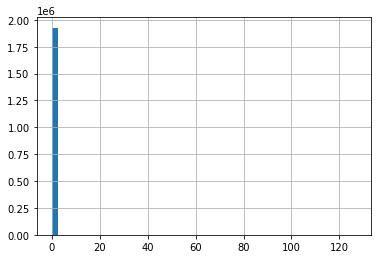

col:  State


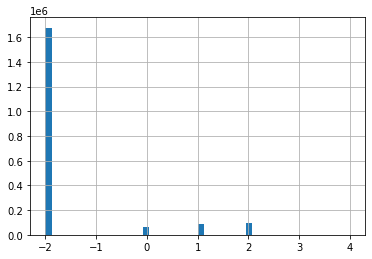

col:  CPU


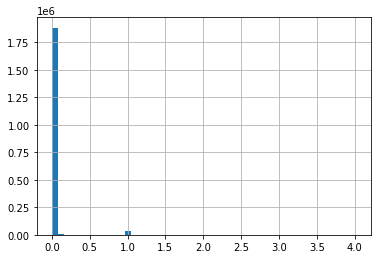

col:  CMD


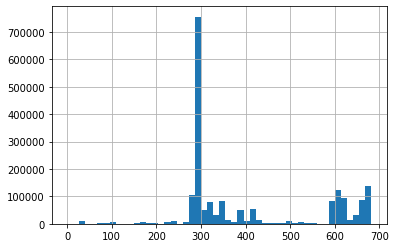

col:  label


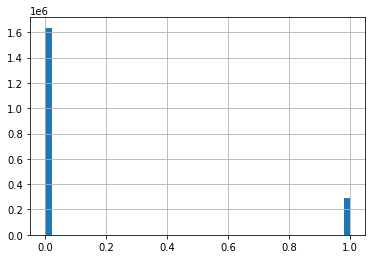

In [9]:
import matplotlib.pyplot as plt
columns = linux_pro.columns

for col in columns:
    print("col: ", col)
    linux_pro[col].hist(bins = 50)
    plt.show()

In [10]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

# Without Oversampling

In [11]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

In [12]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [13]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_logistic = lr.predict(x_test)
print(y_pred_logistic)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionAccuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression : ",LogisticRegressionAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionf1_scr = f1_score(y_test, y_pred_logistic)
print("f1_score of Logistic Regression : ",LogisticRegressionf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_logistic)
print('AUC: %.2f' % auc)

[1 1 1 ... 0 0 0]
Accuracy of Logistic Regression :  74.2896147653903 %
f1_score of Logistic Regression :  38.83355215747441 %
AUC: 0.66


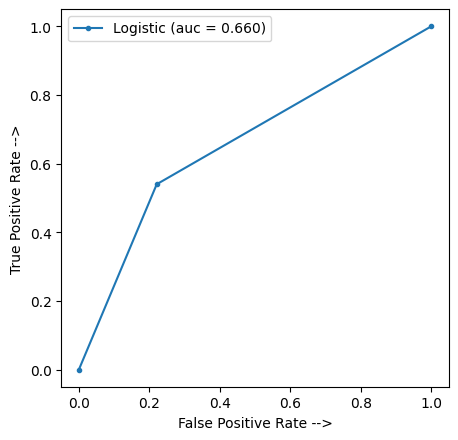

In [14]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [14]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred_logistic)

array([[159366,  45209],
       [ 16752,  19669]])

In [15]:
# Import LR, DTC, EMB, RF, LIME, SHAP

!pip install interpret
from interpret.glassbox import (LogisticRegression, ClassificationTree, ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 1

In [16]:

#Interpretable =>
# %% logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=x_train.columns, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train)
print("Training finished.")
# %% Evaluate logistic regression model
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Explain local prediction
lr_local = lr.explain_local(x_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

Training finished.
F1 Score 0.49001970006581297
Accuracy 0.8461717206924596


In [17]:
# %% LR Lime
from interpret.blackbox import LimeTabular
from interpret import show

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lr.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')
show(lime_local)

F1 Score 0.4909688806981541
Accuracy 0.8442339291938455


In [25]:
from interpret.glassbox import (LogisticRegression, ClassificationTree, ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

In [26]:
# %% decision tree model
tree = ClassificationTree()
tree.fit(x_train, y_train)
print("Training finished.")
y_pred = tree.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Explain local prediction
tree_local = tree.explain_local(x_test[:100], y_test[:100], name='Tree')
show(tree_local)



Training finished.
F1 Score 0.45912997030776237
Accuracy 0.8488730103404206


In [27]:

# # %% Explainable Boosting Machine
# ebm = ExplainableBoostingClassifier(random_state=2021)
# ebm.fit(x_train, y_train) 
# print("Training finished.")
# y_pred = ebm.predict(x_test)
# print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Explain locally
# ebm_local = ebm.explain_local(x_test[:100], y_test[:100], name='EBM')
# show(ebm_local)
# # %% Explain globally
# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

KeyboardInterrupt: ignored

#**Xboost and Shap**

In [15]:
import xgboost
import shap

# train an XGBoost model
shap.initjs()
model = xgboost.XGBRegressor().fit(x, y)

[00:03:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(x)

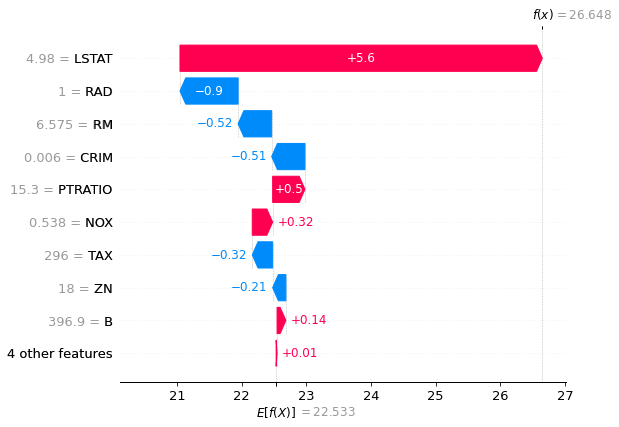

In [17]:
# visualize the first prediction's explanation
shap.initjs()
shap.plots.waterfall(shap_values[0])

In [18]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [19]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values)

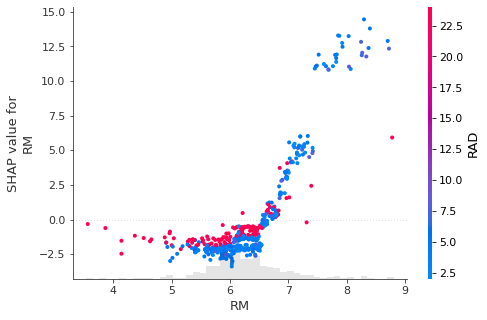

In [20]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.initjs()
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

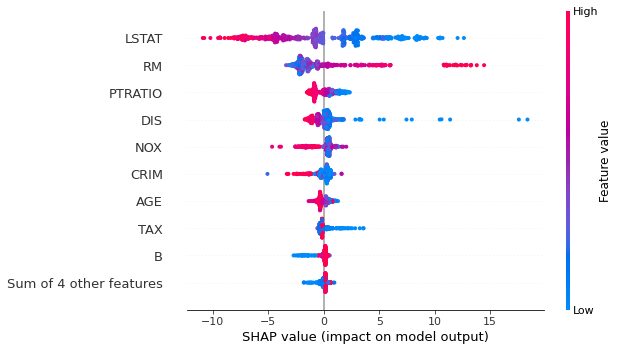

In [21]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

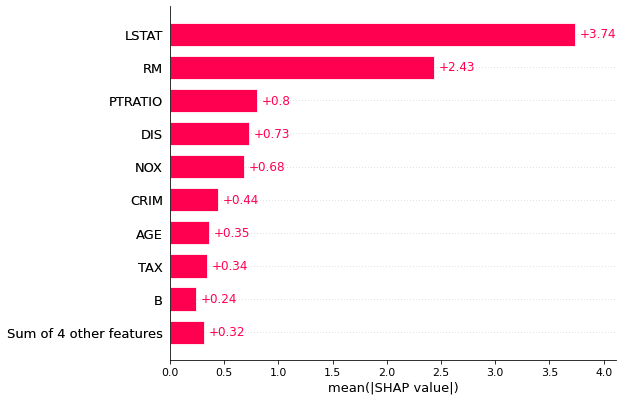

In [22]:
shap.initjs()
shap.plots.bar(shap_values)